In [7]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs2/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs2/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [8]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']



def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [9]:
analysis = scripts.Analysis()

In [10]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs2/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03b_wn_620_720',
                          'ng_6',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_6',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.8_.8_.8_.6_.6_.9',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_1e-24',
                          'crd_a3d1611',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [11]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs2/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03b_wn_620_720',
                          'ng_6',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_6',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.8_.8_.8_.6_.6_.9',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_1e-24',
                          'crd_a3d1611',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [12]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(crd.data['dgdgs'].coords['g'].values) #list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [13]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [14]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [15]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [16]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 620

nband = 100

nv = 200

dv = 0.005

tsfc = 294.0

ng = 6

nref = 1

p_refs = (/ 600 /)

t_refs = (/ 250 /)

ng_refs = (/ 6 /)

data wgt
     &     /.8, .8, .8, .6, .6, .9/

option_wgt_flux = 2

option_wgt_k = 1

option_klin = 1

klin = 1e-24

include 'mls75.pro'


In [17]:
fig.display_hrefanchor()

In [18]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [19]:
table_dgdgs.display_hrefanchor()

In [20]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [21]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [22]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

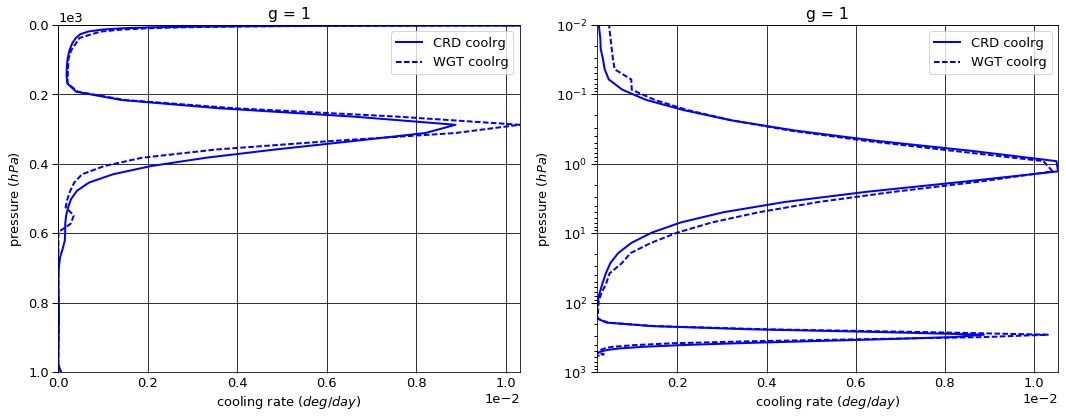

# Figure: cooling rate g-group 2

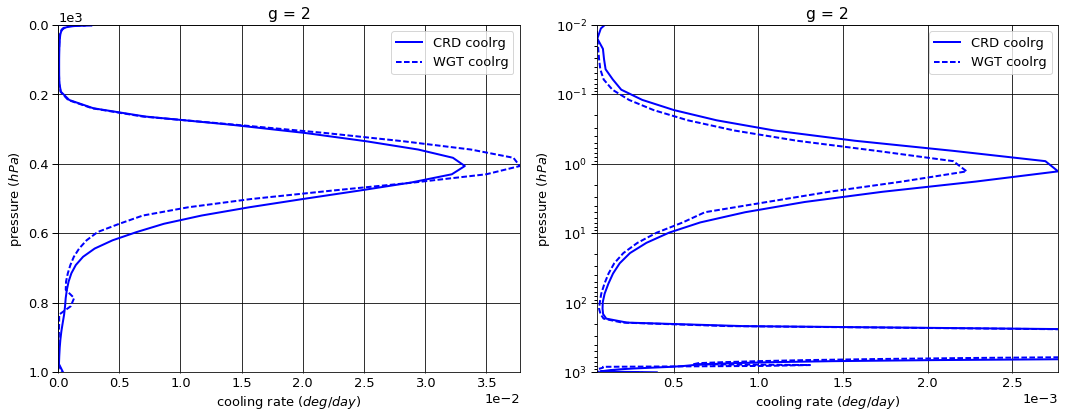

# Figure: cooling rate g-group 3

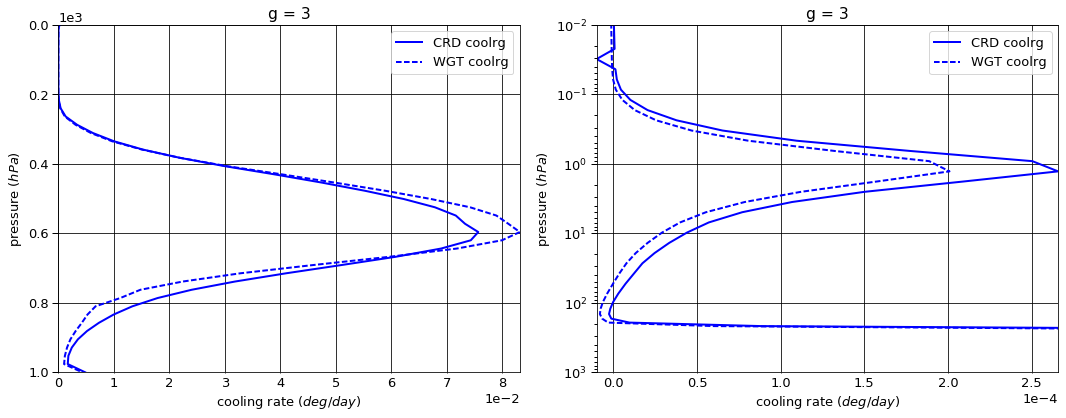

# Figure: cooling rate g-group 4

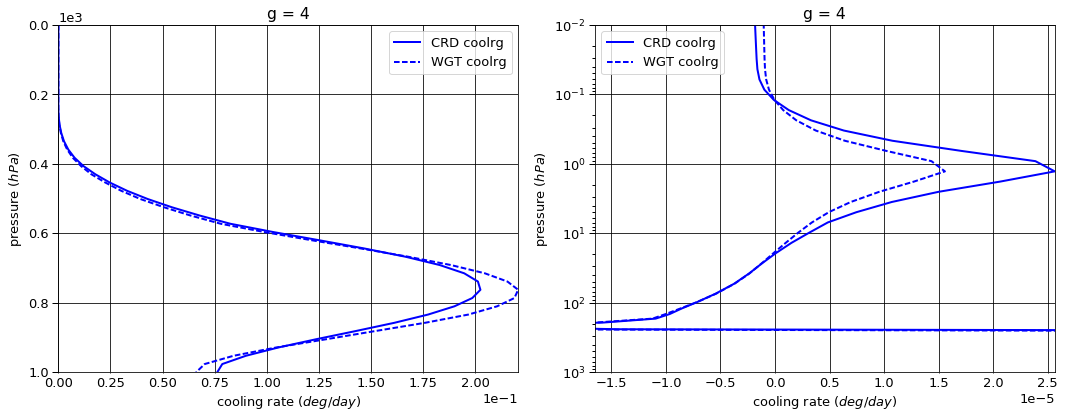

# Figure: cooling rate g-group 5

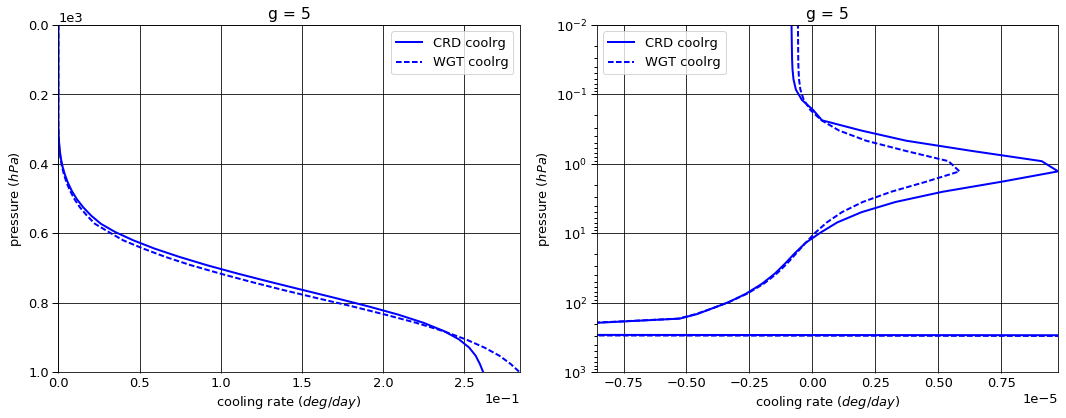

# Figure: cooling rate g-group 6

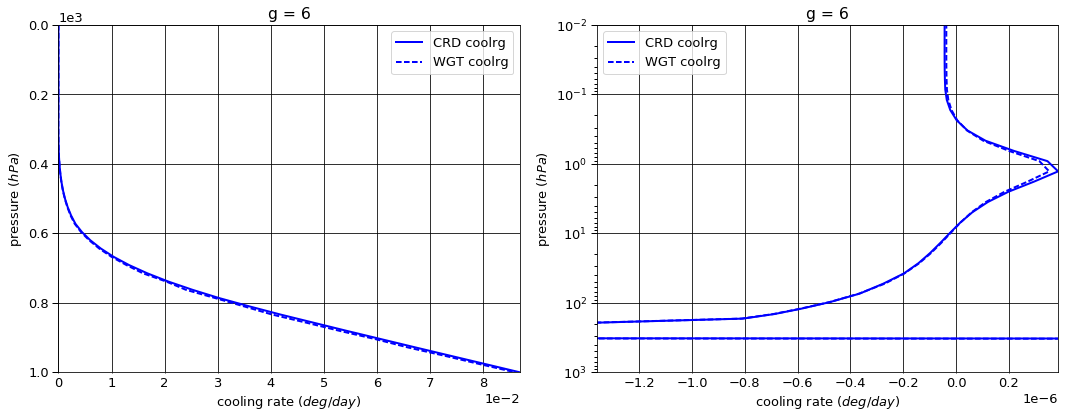

# Figure: cooling rate g-group total

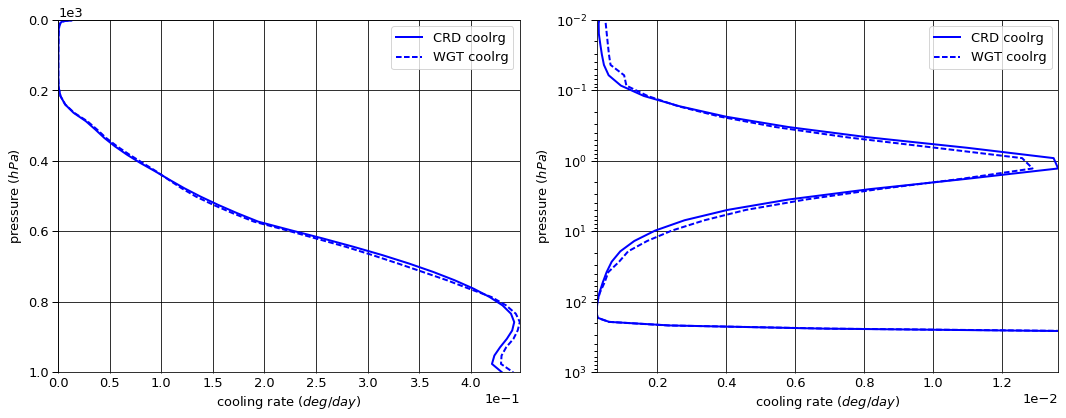

In [23]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [24]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g pressure level                                 
1 0.0      1      -0.150709   0.000000  -0.150709
  1013.0   76     -0.333859   0.333691  -0.000168
2 0.0      1      -0.935182   0.000000  -0.935182
  1013.0   76     -1.698556   1.697504  -0.001052
3 0.0      1      -2.830706   0.000000  -2.830706
  1013.0   76     -4.092142   4.078124  -0.014018
4 0.0      1      -9.076512   0.000000  -9.076512
  1013.0   76    -10.926934  10.355979  -0.570955
5 0.0      1     -16.034464   0.000000 -16.034464
  1013.0   76    -17.098624   9.796355  -7.302268
6 0.0      1      -9.625443   0.000000  -9.625443
  1013.0   76     -9.814722   2.149115  -7.665607


WGT


flug       fldg      fnetg
g pressure level                                 
1 0.0      1      -0.146477   0.000000  -0.146477
  1013.0   76     -0.333859   0.333691  -0.000168
2 0.0      1      -0.914207   0.000000  -0.914207
  1013.0   76     -1.698556   1.697684  -0.000872
3 0.0      1      -2.794987   0.000000  -2.794987
  1013.0   76     -4.092142   4.080701  -0.011441
4 0.0      1      -9.065693   0.000000  -9.065693
  1013.0   76    -10.926934  10.581701  -0.345233
5 0.0      1     -16.102469   0.000000 -16.102469
  1013.0   76    -17.098624   9.593358  -7.505266
6 0.0      1      -9.630173   0.000000  -9.630173
  1013.0   76     -9.814722   2.099285  -7.715437


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.004232  0.000000  0.004232
  1013.0   76     0.000000  0.000000  0.000000
2 0.0      1      0.020975  0.000000  0.020975
  1013.0   76     0.000000  0.000180  0.000180
3 0.0      1      0.035719  0.000000  0.035719
  1013.0   76     0.000000  0.002577  0.002577
4 0.0      1      0.010819  0.000000  0.010819
  1013.0   76     0.000000  0.225722  0.225722
5 0.0      1     -0.068005  0.000000 -0.068005
  1013.0   76     0.000000 -0.202998 -0.202998
6 0.0      1     -0.004730  0.000000 -0.004730
  1013.0   76     0.000000 -0.049831 -0.049831

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1      5.442654e-05
  1001.112500 75     6.055797e-05
2 0.000312    1      2.455227e-05
  1001.112500 75     3.991249e-04
3 0.000312    1     -7.215398e-07
  1001.112500 75     4.830350e-03
4 0.000312    1     -2.113026e-06
  1001.112500 75     7.622932e-02
5 0.000312    1     -8.544040e-07
  1001.112500 75     2.616142e-01
6 0.000312    1     -4.246082e-08
  1001.112500 75     8.695903e-02


WGT


coolrg
g pressure    layer              
1 0.000312    1      2.874612e-04
  1001.112500 75     6.055797e-05
2 0.000312    1      1.020358e-05
  1001.112500 75     3.143382e-04
3 0.000312    1     -1.896922e-06
  1001.112500 75     4.313719e-03
4 0.000312    1     -1.193778e-06
  1001.112500 75     6.609361e-02
5 0.000312    1     -5.843167e-07
  1001.112500 75     2.841398e-01
6 0.000312    1     -3.614454e-08
  1001.112500 75     8.606910e-02


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      2.330346e-04
  1001.112500 75     0.000000e+00
2 0.000312    1     -1.434869e-05
  1001.112500 75    -8.478666e-05
3 0.000312    1     -1.175382e-06
  1001.112500 75    -5.166309e-04
4 0.000312    1      9.192480e-07
  1001.112500 75    -1.013571e-02
5 0.000312    1      2.700873e-07
  1001.112500 75     2.252551e-02
6 0.000312    1      6.316287e-09
  1001.112500 75    -8.899350e-04

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-38.653016,0.000000,-38.653016
1013.0,76,-43.964837,28.410769,-15.554069



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-38.654006,0.00000,-38.654006
1013.0,76,-43.964837,28.38642,-15.578418



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-0.000991,0.000000,-0.000991
1013.0,76,0.000000,-0.024349,-0.024349


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.000075
1001.112500,75,0.430093



WGT


,,coolrg
pressure,layer,
0.000312,1,0.000294
1001.112500,75,0.440991



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.000219
1001.112500,75,0.010898


In [25]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.00750,0.007722
2,0.03850,0.038815
3,0.09275,0.093538
4,0.24780,0.249559
5,0.38800,0.390004
6,0.22545,0.220362


In [26]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,1.620340e-21
2,2.553906e-22
3,4.025348e-23
4,6.344568e-24
5,1.000002e-24
6,1.307067e-25


In [27]:
def spreadsheet():
    ng = crd.data['dgdgs'].dims['g']
    ng_refs = [6]
    p_refs = [600]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [28]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,1.620340e-21,NaN,0.00750,0.007722,0.00750,0.007722,600.0
2,2.553906e-22,0.157615,0.03850,0.038815,0.04600,0.046537,600.0
3,4.025348e-23,0.157615,0.09275,0.093538,0.13875,0.140075,600.0
4,6.344568e-24,0.157615,0.24780,0.249559,0.38655,0.389634,600.0
5,1.000002e-24,0.157615,0.38800,0.390004,0.77455,0.779638,600.0
6,1.307067e-25,0.130706,0.22545,0.220362,1.00000,1.000000,600.0


In [29]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [30]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog      ratio
layer g                                                    
1     1     0.000312  4.002507e-21  9.989778e-23  40.066024
      2     0.000312  1.713419e-22  3.577750e-24  47.890968
      3     0.000312  2.091495e-24  1.719173e-25  12.165704
      4     0.000312  2.870620e-25  2.338203e-26  12.277034
      5     0.000312  6.197295e-26  4.428621e-27  13.993735
      6     0.000312  3.884443e-27  4.087491e-28   9.503246
2     1     0.000750  4.028019e-21  1.000450e-22  40.262082
      2     0.000750  1.723665e-22  3.584394e-24  48.088042
      3     0.000750  2.114421e-24  1.724870e-25  12.258437
      4     0.000750  2.882523e-25  2.346587e-26  12.283895
      5     0.000750  6.239445e-26  4.445493e-27  14.035439
      6     0.000750  3.912922e-27  4.116054e-28   9.506489
3     1     0.001052  4.082710e-21  1.003182e-22  40.697590
      2     0.001052  1.745649e-22  3.596304e-24  48.540093
      3     0.001052  2.163454e-24  1.735055e-25  12.469080
      4     0.001052  2.907970e-25  2.363169e-26  12.305384
      5     0.001052  6.329842e-26  4.478996e-27  14.132281
      6     0.001052  3.973667e-27  4.173495e-28   9.521197
4     1     0.001476  4.141257e-21  1.006161e-22  41.159003
      2     0.001476  1.769199e-22  3.609514e-24  49.014889
      3     0.001476  2.216757e-24  1.746258e-25  12.694328
      4     0.001476  2.935345e-25  2.381082e-26  12.327780
      5     0.001476  6.427047e-26  4.514831e-27  14.235411
      6     0.001476  4.039012e-27  4.235737e-28   9.535559
5     1     0.002070  4.200519e-21  1.009274e-22  41.619223
      2     0.002070  1.793054e-22  3.623635e-24  49.482193
      3     0.002070  2.271630e-24  1.758116e-25  12.920821
      4     0.002070  2.963214e-25  2.399531e-26  12.349139
      5     0.002070  6.525928e-26  4.551332e-27  14.338501
      6     0.002070  4.105543e-27  4.299930e-28   9.547929
6     1     0.002904  4.260439e-21  1.012569e-22  42.075524
      2     0.002904  1.817191e-22  3.638974e-24  49.936903
      3     0.002904  2.328116e-24  1.770855e-25  13.146846
      4     0.002904  2.991573e-25  2.418669e-26  12.368677
      5     0.002904  6.626432e-26  4.588757e-27  14.440581
      6     0.002904  4.173264e-27  4.366500e-28   9.557459
7     1     0.004074  4.321004e-21  1.016118e-22  42.524647
      2     0.004074  1.841605e-22  3.655975e-24  50.372470
      3     0.004074  2.386330e-24  1.784805e-25  13.370258
      4     0.004074  3.020452e-25  2.438735e-26  12.385324
      5     0.004074  6.728601e-26  4.627518e-27  14.540411
      6     0.004074  4.242259e-27  4.436129e-28   9.562976
8     1     0.005714  4.382197e-21  1.020018e-22  42.961965
      2     0.005714  1.866290e-22  3.675270e-24  50.779673
      3     0.005714  2.446421e-24  1.800427e-25  13.588004
      4     0.005714  3.049885e-25  2.460064e-26  12.397585
      5     0.005714  6.832483e-26  4.668199e-27  14.636228
      6     0.005714  4.312640e-27  4.509791e-28   9.562838
9     1     0.008015  4.444003e-21  1.024412e-22  43.381017
      2     0.008015  1.891238e-22  3.697748e-24  51.145673
      3     0.008015  2.508593e-24  1.818370e-25  13.795833
      4     0.008015  3.079926e-25  2.483135e-26  12.403376
      5     0.008015  6.938153e-26  4.711637e-27  14.725569
      6     0.008015  4.384569e-27  4.588881e-28   9.554768
10    1     0.011243  4.506368e-21  1.029498e-22  43.772477
      2     0.011243  1.916428e-22  3.724666e-24  51.452335
      3     0.011243  2.573093e-24  1.839535e-25  13.987736
      4     0.011243  3.110631e-25  2.508615e-26  12.399794
      5     0.011243  7.045660e-26  4.758999e-27  14.804920
      6     0.011243  4.458242e-27  4.675358e-28   9.535616
11    1     0.015771  4.569220e-21  1.035557e-22  44.123300
      2     0.015771  1.941827e-22  3.757795e-24  51.674645
      3     0.015771  2.640258e-24  1.865179e-25  14.155517
      4     0.015771  3.142082e-25  2.537448e-26  12.382839
      5     0.015771  7.155068e-26  4.811942e-27  14

# Histogram of wavenumbers in g-group 1

In [31]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [32]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
